# 01 - Data Exploration and Analysis 

Objectives
- Load and explore the housing dataset
- Understand the structure and content
- Identify missing values
- Analyze correlations with SalePrice
- Create visualizations of key relationships


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/Users/sararosati/Desktop/vscode-projects/Heritage-Housing/Heritage-housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/Users/sararosati/Desktop/vscode-projects/Heritage-Housing/Heritage-housing'

# Section 1

Section 1 content

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


---

# Section 2

Section 2 content

In [6]:
# Load the main dataset
df = pd.read_csv('inputs/datasets/house_prices_records.csv')

# Load the 4 inherited houses
inherited_df = pd.read_csv('inputs/datasets/inherited_houses.csv')

print(f"Dataset shape: {df.shape}")
print(f"Inherited houses shape: {inherited_df.shape}")
print("\nFirst rows of main dataset:")
print(df.head())

Dataset shape: (1460, 24)
Inherited houses shape: (4, 23)

First rows of main dataset:
   1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   
3       961       NaN           NaN           No         216          ALQ   
4      1145       NaN           4.0           Av         655          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   
3        540            NaN         642          Unf  ...         60.0   
4        490            0.0         836          RFn  ...         84.0   

   Ma

In [7]:
# Dataset information and statistics
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("\nDescriptive Statistics:")
print(df.describe())
print("\n" + "="*50)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  

Correlation with SalePrice (Top 10):
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


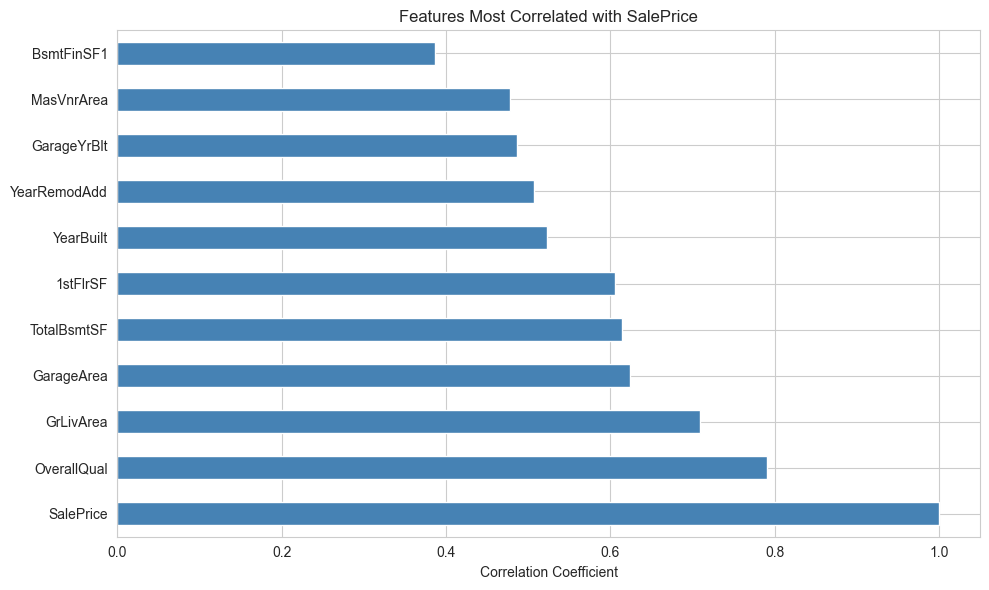

In [9]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Analyze correlation with SalePrice
correlation_matrix = numeric_df.corr()
top_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)

print("Correlation with SalePrice (Top 10):")
print(top_correlations.head(11))

# Visualize top correlations
fig, ax = plt.subplots(figsize=(10, 6))
top_correlations.head(11).plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Correlation Coefficient')
ax.set_title('Features Most Correlated with SalePrice')
plt.tight_layout()
plt.show()

## Key Findings from Correlation Analysis

The analysis reveals:
- **OverallQual** has the strongest correlation (0.79) with SalePrice
- **GrLivArea** (living area) is the second most important factor (0.71)
- **GarageArea** and **TotalBsmtSF** also show strong correlations
- These features will be crucial for our ML model

---

# Section 3

Missing Values Analysis:
               Missing_Count  Percentage
EnclosedPorch           1324   90.684932
WoodDeckSF              1305   89.383562
LotFrontage              259   17.739726
GarageFinish             235   16.095890
BsmtFinType1             145    9.931507
BedroomAbvGr              99    6.780822
2ndFlrSF                  86    5.890411
GarageYrBlt               81    5.547945
BsmtExposure              38    2.602740
MasVnrArea                 8    0.547945


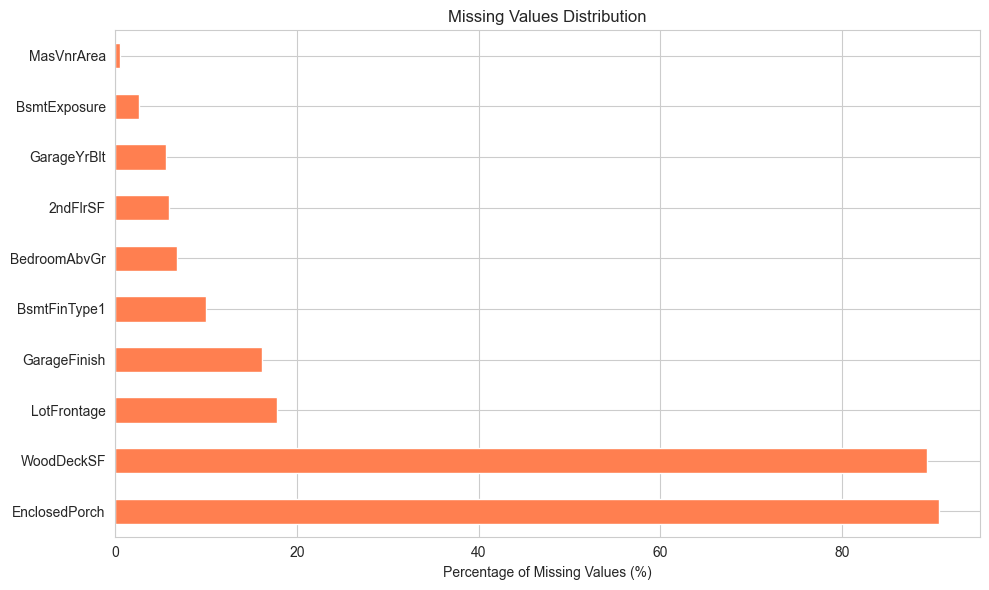

In [10]:
# Analyze missing values in detail
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Percentage': missing_percentage
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Percentage', ascending=False)

print("Missing Values Analysis:")
print(missing_data)

# Visualize missing values
fig, ax = plt.subplots(figsize=(10, 6))
missing_data['Percentage'].plot(kind='barh', ax=ax, color='coral')
ax.set_xlabel('Percentage of Missing Values (%)')
ax.set_title('Missing Values Distribution')
plt.tight_layout()
plt.show()

## Missing Values Strategy

- **EnclosedPorch & WoodDeckSF**: >89% missing - will be dropped (too sparse)
- **LotFrontage**: 17.7% missing - will be filled with median by neighborhood
- **Other features**: <17% missing - will be handled appropriately during data cleaning

---

## Inherited Houses Analysis

In [11]:
# Analyze the 4 inherited houses
print("Inherited Houses Data:")
print(inherited_df)
print("\nInherited houses shape:", inherited_df.shape)

Inherited Houses Data:
   1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       896         0             2           No       468.0          Rec   
1      1329         0             3           No       923.0          ALQ   
2       928       701             3           No       791.0          GLQ   
3       926       678             3           No       602.0          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotArea  \
0      270.0              0       730.0          Unf  ...    11622   
1      406.0              0       312.0          Unf  ...    14267   
2      137.0              0       482.0          Fin  ...    13830   
3      324.0              0       470.0          Fin  ...     9978   

   LotFrontage MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  \
0         80.0        0.0            0            6            5        882.0   
1         81.0      108.0           36            6            6       1329.0 

## Key Observations on Inherited Houses

- All 4 houses have complete data (no missing values in key features)
- **House 0**: 896 sq ft, OverallQual=5, YearBuilt=1961
- **House 1**: 1329 sq ft, OverallQual=6, YearBuilt=1958 (largest)
- **House 2**: 928 sq ft + 701 sq ft 2nd floor, OverallQual=5, YearBuilt=1997
- **House 3**: 926 sq ft + 678 sq ft 2nd floor, OverallQual=6, YearBuilt=1998

These houses will be used for final price predictions in the ML model.

## Summary

This data exploration notebook successfully:
✓ Loaded and explored 1,460 house records with 24 features
✓ Identified OverallQual and GrLivArea as top price predictors
✓ Analyzed missing values distribution
✓ Reviewed the 4 inherited houses requiring price predictions

Next steps: Data cleaning and feature engineering

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
